Jacob Sayono

505368811

CS M146 HW 4

# Problem 1

### True/False Questions
**(a) TRUE** Both K-Means and Gaussian Mixture Model (GMM) algorithms require setting the number of clusters $ K $ as a hyperparameter, which determines the number of centroids in K-Means and the number of Gaussian distributions in GMM.

**(b) FALSE** The optimization objective of K-means, which is to minimize the sum of squared distances between data points and their nearest cluster centers, is non-convex due to the assignment step, where each point is assigned to the nearest cluster center.

**(c) TRUE** If all weights in a neural network are initialized to zero, the output from each neuron will be zero regardless of the input. Since the ReLU activation function will also output zero, there will be no gradient signal to backpropagate through the network during training.

**(d) FALSE** If all the cluster centers are initialized to the same data point in K-means, the algorithm will still need to go through the assignment and update steps iteratively to find distinct cluster centers that minimize the objective function unless all data points are identical.

**(e) TRUE** As stated in response to (b), the optimization objective of K-means is non-convex due to the discrete nature of cluster assignment, which involves assigning each data point to the nearest cluster center.

**(f) TRUE** If the data lies in a k-dimensional space and k principal components are used in PCA, it will capture all the variance in the data, leading to zero reconstruction error.

**(g) TRUE** If some features in a k-dimensional space are linear combinations of others, these dependencies imply reduced rank of the data matrix, and thus fewer than k principal components might still capture all the variance in the data, leading to zero reconstruction error.

**(h) TRUE** Training multiple neural networks with different initializations and averaging their predictions can help improve generalization by reducing variance in the model predictions, a technique often referred to as ensemble learning.

**(i) TRUE** Momentum update in training algorithms uses a combination of the current gradient and a fraction of the previous update (momentum), effectively smoothing out the updates and potentially leading to faster convergence.

**(j) TRUE** For efficient implementation of backpropagation, it's necessary to store all activations from the forward pass. These activations are used to compute gradients for each layer in the network during the backward pass.

### Multiple Choice Questions
**(k) ii** Gaussian mixture coefficients in GMMs may vary and are learned through the Expectation-Maximization (EM) algorithm, which adjusts these coefficients based on the probability of each data point belonging to each cluster.

**(l) iii** The K-means algorithm's result is highly dependent on the initial assignment of cluster centers, which can significantly influence the final clusters formed.

**(m) iii, iv** In GMMs, the likelihood of the data under a given cluster assignment is modeled as a Gaussian distribution, and in the EM algorithm, the E-step computes the expected values of the latent variables given the current parameter estimates, while the M-step updates the parameters maximizing the expected likelihood.

**(n) i** In Kernel PCA, the principal components are computed through the eigendecomposition of the Kernel matrix, which represents the inner products of data points in a high-dimensional feature space.

**(o) ii, iii** PCA minimizes the reconstruction error between the original and the projected data, and the principal components are scalar multiples of the eigenvectors of the covariance matrix $ XX^T $.

**(p) ii, iii** The ReLU function is differentiable everywhere except at $ x = 0 $, and the derivative is 1 for $ x > 0 $ and 0 for $ x < 0 $.

**(q) i, ii, iii** These statements correctly reflect the chain rule application in partial derivatives for a network of composed functions with the sigmoid activation function. The derivatives for each variable depend on the derivatives of the functions it influences directly and indirectly through the network.


# Problem 2

Given $m$ vectors $x_1, \dots, x_m$ in $\mathbb{R}^d$, and a random vector $x$ uniformly distributed over $x_1, \dots, x_m$, with the expectation $E[x] = 0$, we aim to find a unit vector $w \in \mathbb{R}^d$ such that the random variable $w^\top x$ has maximal variance. The problem is formulated as:

$$
w^* = \arg\max_{w: \|w\| = 1} \operatorname{Var}(w^\top x) = \arg\max_{w: \|w\| = 1} \frac{1}{m} \sum_{i=1}^m (w^\top x_i)^2
$$

Express the variance in matrix terms. The variance of $w^\top x$ can be rewritten using matrix notation. Let $X$ be the $d \times m$ matrix whose columns are the vectors $x_i$. Then the expression inside the variance can be rewritten using the matrix $X$:

$$
\frac{1}{m} \sum_{i=1}^m (w^\top x_i)^2 = w^\top \left(\frac{1}{m} X X^\top \right) w
$$

Use spectral decomposition. The matrix $\frac{1}{m} X X^\top$ is a symmetric matrix and can be decomposed into its eigenvalues and eigenvectors. Let $X X^\top = U \Lambda U^\top$ be the eigen-decomposition of $X X^\top$, where $U$ is the matrix of eigenvectors and $\Lambda$ is the diagonal matrix of eigenvalues.

Maximize the variance. The expression $w^\top \left(\frac{1}{m} X X^\top \right) w$ can be maximized by choosing $w$ as the eigenvector corresponding to the largest eigenvalue of $\frac{1}{m} X X^\top$. This is because, for any unit vector $w$, the quadratic form $w^\top U \Lambda U^\top w$ reaches its maximum when $w$ aligns with the eigenvector associated with the largest eigenvalue.

Thus, the unit vector $w^*$ that maximizes the variance of $w^\top x$ is the eigenvector of $X X^\top$ corresponding to its largest eigenvalue.


# Problem 3: A Two-Layer Neural Network for Binary Classification

In [2]:
import pandas as pd
import numpy as np
import os
import gzip
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## Load fashionMNIST. This is the same code with homework 1.
## 
def crop_center(img,cropped):
    img = img.reshape(-1, 28, 28)
    start = 28//2-(cropped//2)   
    img = img[:, start:start+cropped, start:start+cropped]
    return img.reshape(-1, cropped*cropped)

def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), 'B', offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(),'B', offset=16).reshape(-1, 784)
        images = crop_center(images, 24)
    return images, labels
X_train_and_val, y_train_and_val = load_mnist('./data/mnist', kind='train')
X_test, y_test = load_mnist('./data/mnist', kind='t10k')
X_train, X_val = X_train_and_val[:50000], X_train_and_val[50000:]
y_train, y_val = y_train_and_val[:50000], y_train_and_val[50000:]
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Val data shape: ', X_val.shape)
print('Val target shape: ', y_val.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (50000, 576)
Train target shape:  (50000,)
Val data shape:  (10000, 576)
Val target shape:  (10000,)
Test data shape:  (10000, 576)
Test target shape:  (10000,)


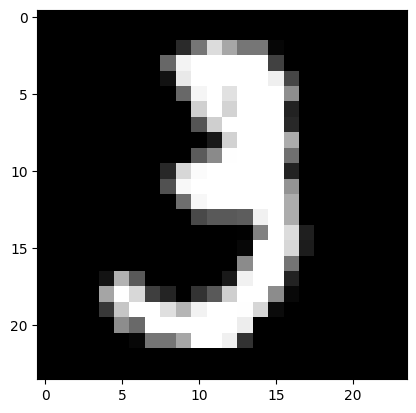

Label is Odd


In [3]:
# PART (a): 
# To Visualize a point in the dataset
index = 10
X = np.array(X_train[index], dtype='uint8').reshape([24, 24])
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] in set([1, 3, 5, 7, 9]):
    label = 'Odd'
else:
    label = 'Even'
print('Label is', label)

In the following cells, you will build a two-layer neural network.

In [4]:
# convert to binary label
y_train = y_train.astype(int) % 2
y_val = y_val.astype(int) % 2
y_test = y_test.astype(int) % 2

### Part (c)

The ℓ2 regularization formula is:

$$
\text{RegLoss} = \frac{\lambda}{2} \left( \|W_1\|^2_F + \|W_2\|^2_F \right)
$$

where $\lambda$ is the regularization strength, and $\|W\|_F^2$ denotes the Frobenius norm (sum of squares of all elements) for a weight matrix $W$.

### Part (d)

The softmax cross-entropy loss and its gradient with respect to the input scores $x$ are calculated as follows:

$$
\text{loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y^{(i)}_j \log \left( \frac{e^{x^{(i)}_j}}{\sum_{k=1}^C e^{x^{(i)}_k}} \right)
$$

Gradient:

$$
\frac{\partial L}{\partial x^{(i)}_j} = \hat{p}^{(i)}_j - y^{(i)}_j
$$

where $\hat{p}^{(i)}_j$ is the predicted probability of class $j$ for example $i$ and $y^{(i)}$ is the one-hot encoded true label.

### Part (e)

Formula for gradients of $W_2$ and $b_2$:

$$
\frac{\partial L}{\partial W_2} = a_1^\top \delta_3 + \lambda W_2
$$
$$
\frac{\partial L}{\partial b_2} = \sum_{i=1}^N \delta_3^{(i)}
$$

where $\delta_3 = \frac{\partial L}{\partial h_2}$ and $h_2$ is the output of the second layer before applying softmax.


In [9]:
class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network for binary classification. 
    We train the network with a softmax output and cross entropy loss function 
    with L2 regularization on the weight matrices. The network uses a ReLU 
    nonlinearity after the first fully connected layer.
    Input: X
    Hidden states for layer 1: h1 = XW1 + b1
    Activations: a1 = ReLU(h1)
    Hidden states for layer 2: h2 = a1W2 + b2
    Probabilities: s = softmax(h2)
    
    ReLU function: 
    (i) x = x if x >= 0  (ii) x = 0 if x < 0

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        # Compute the forward pass
        scores = None

        ### ========== TODO : START ========== ###
        #   Calculate the output of the neural network using forward pass.  
        #   The result should have (N, C), where N is the number of examples, and C is the number 
        #   of classes. 
        #   The output of the second fully connected layer is the output scores (before softmax). 
        #   Do not use a for loop in your implementation.
        #   Please use 'h1' as input of hidden layers, and 'a1' as output of 
        #   Refer to the comments at the beginning of this class for the model architecture
        #   You may simply use np.maximun for implementing ReLU.
        ##  Part (b): Implement the forward pass and compute scores.

        # first hidden layer activations
        h1 = np.dot(X, W1) + b1
        # ReLU non-linearity
        a1 = np.maximum(0, h1)
        # output scores before softmax
        scores = np.dot(a1, W2) + b2


        ### ========== TODO : END ========== ###


        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
        loss = None

        # scores is num_examples by num_classes (N, C)
        def softmax_loss(x, y):
            ### ========== TODO : START ========== ###
            #   Calculate the cross entropy loss after softmax output layer.
            #   This function should return loss and dx
            probs = np.exp(x - np.max(x, axis=1, keepdims=True))
            probs /= np.sum(probs, axis=1, keepdims=True)
            N = x.shape[0]
            ##  Part (d): Implement the CrossEntropyLoss
            loss = np.sum(-np.log(probs[range(N), y])) / N
            ##  Part (d): Implement the gradient of y wrt x
            dx = probs
            dx[range(N), y] -= 1
            dx /= N
            
            ### ========== TODO : END ========== ###
            return loss, dx
        
        
        data_loss, dscore = softmax_loss(scores, y) 
        
        ### ========== TODO : START ========== ###
        #   Calculate the regularization loss. Multiply the regularization
        #   loss by 0.5 (in addition to the factor reg).
        ##  Part (c): Implement the regularization loss
        reg_loss = 0.5 * reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
        ### ========== TODO : END ========== ###

        loss = data_loss + reg_loss

        grads = {}

        ### ========== TODO : START ========== ###
        #  Compute backpropagation
        #  Remember the loss contains two parts: cross-entropy and regularization. The computation for gradients of W1 and b1 shown here can be regarded as a reference.
        ## Part (e): Implement the computations of gradients for W2 and b2.
        grads['W2'] = np.dot(a1.T, dscore) + reg * W2
        grads['b2'] = np.sum(dscore, axis=0)
        
        dh = np.dot(dscore, W2.T)
        dh[a1 <= 0] = 0

        grads['W1'] = np.dot(X.T, dh) + reg * W1
        grads['b1'] = np.ones(N).dot(dh)
        ### ========== TODO : END ========== ###

        return loss, grads

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in np.arange(num_iters):
            X_batch = None
            y_batch = None

            #   Create a minibatch (X_batch, y_batch) by sampling batch_size 
            #   samples randomly.

            b_index = np.random.choice(num_train, batch_size)
            X_batch = X[b_index]
            y_batch = y[b_index]

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            
            self.params['W1'] -= learning_rate * grads['W1']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b2'] -= learning_rate * grads['b2']


            if verbose and it % 100 == 0:
                print('iteration {} / {}: loss {}'.format(it, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        ### ========== TODO : START ========== ###
        #   Predict the class given the input data.
        ##  Part (f): Implement the prediction function

        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        h1 = np.dot(X, W1) + b1
        a1 = np.maximum(0, h1)
        scores = np.dot(a1, W2) + b2
        y_pred = np.argmax(scores, axis=1)
        
        ### ========== TODO : END ========== ###

        return y_pred

In [10]:
input_size = 576
hidden_size = 50
num_classes = 2
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
for learning_rate in [1e-5, 1e-4, 1e-3, 5e-3, 1e-1]:
  print('learning_rate: ', learning_rate)
  stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=200,
              learning_rate=learning_rate, learning_rate_decay=0.95,
              reg=0.1, verbose=True)

  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()
  print('Validation accuracy: ', val_acc)

  # Save this net as the variable subopt_net for later comparison.
  subopt_net = net
  test_acc = (subopt_net.predict(X_test) == y_test).mean()
  print('Test accuracy (subopt_net): ', test_acc)
  print('\n')

learning_rate:  1e-05
iteration 0 / 1000: loss 0.6931717862022752
iteration 100 / 1000: loss 0.6931574493301498
iteration 200 / 1000: loss 0.6931447921426536
iteration 300 / 1000: loss 0.6931277505293469
iteration 400 / 1000: loss 0.6931002343278104
iteration 500 / 1000: loss 0.6930653726028959
iteration 600 / 1000: loss 0.6930349529047278
iteration 700 / 1000: loss 0.6929412196252246
iteration 800 / 1000: loss 0.6928953403945343
iteration 900 / 1000: loss 0.6927802161290025
Validation accuracy:  0.7917
Test accuracy (subopt_net):  0.7874


learning_rate:  0.0001
iteration 0 / 1000: loss 0.6925604297140411
iteration 100 / 1000: loss 0.6675138009466661
iteration 200 / 1000: loss 0.4651511450975163
iteration 300 / 1000: loss 0.3881066271864986
iteration 400 / 1000: loss 0.3333056491216653
iteration 500 / 1000: loss 0.37050280498431254
iteration 600 / 1000: loss 0.32285126997656066
iteration 700 / 1000: loss 0.2948683050664358
iteration 800 / 1000: loss 0.31842612936582926
iteration 900 /

# Problem 4: K-Means Algorithm

In [11]:
## Function to load the CIFAR10 data
## Documentation of CIFAR10: https://www.cs.toronto.edu/~kriz/cifar.html
def dataloader():
  import tensorflow as tf
  cifar10 = tf.keras.datasets.cifar10
  (_, _), (X, y) = cifar10.load_data()
  return X, y

In [12]:
## simple utility function to visualize the data
def visualize(X, ind):
  from PIL import Image 
  plt.imshow(Image.fromarray(X[ind], 'RGB'))

In [13]:
X, y = dataloader()

2024-06-08 21:44:47.566862: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-08 21:44:47.645120: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 21:44:48.108572: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-08 21:44:48.110532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 21:44:50.587449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

170498071/170498071 [==============================] - 8s 0us/step


In [14]:
# 10K images of size 32 x 32 x 3 
# where 32 x 32 is the height and width of the image
# 3 is the number of channels 'RGB'
X.shape, y.shape

((10000, 32, 32, 3), (10000, 1))

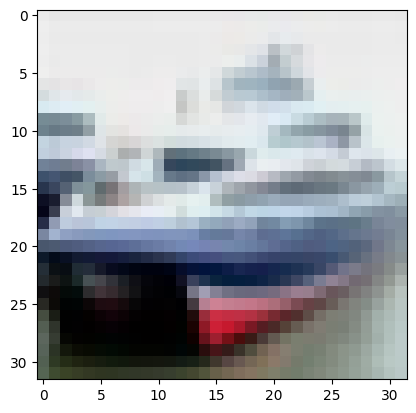

In [15]:
visualize(X, 1)

In [16]:
'''
  Implement this function to form a 10000 x N matrix 
  from 10000 x 32 x 32 x 3 shape input.
'''
def reshape(X):
  '''
    Write one line of code here
  '''
  ### ========== TODO : START ========== ###
  # part (a)
  X = X.reshape(X.shape[0], -1)
  ### ========== TODO : END ========== ###
  return X

In [17]:
X = reshape(X)

In [18]:
clustering_score = []
for i in tqdm(range(5, 20, 5)):
  score = 0
  for rs in tqdm(range(3)):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = rs)
    '''
      Write one line of code to fit the kMeans algorithm to the data
      Write another line of code to report the kMeans clustering score 
      defined as sum of squared distances of samples to their closest 
      cluster center, weighted by the sample weights if provided.
      Hint: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    '''
    ### ========== TODO : START ========== ###
    # part (b)
    kmeans.fit(X)
    score += kmeans.inertia_  # inertia_: sum of squared distances of samples to their closest cluster center
    ### ========== TODO : END ========== ###
  clustering_score.append(score/3) ## divide by 3 because 3 random states

100%|██████████| 3/3 [05:02<00:00, 100.91s/it]


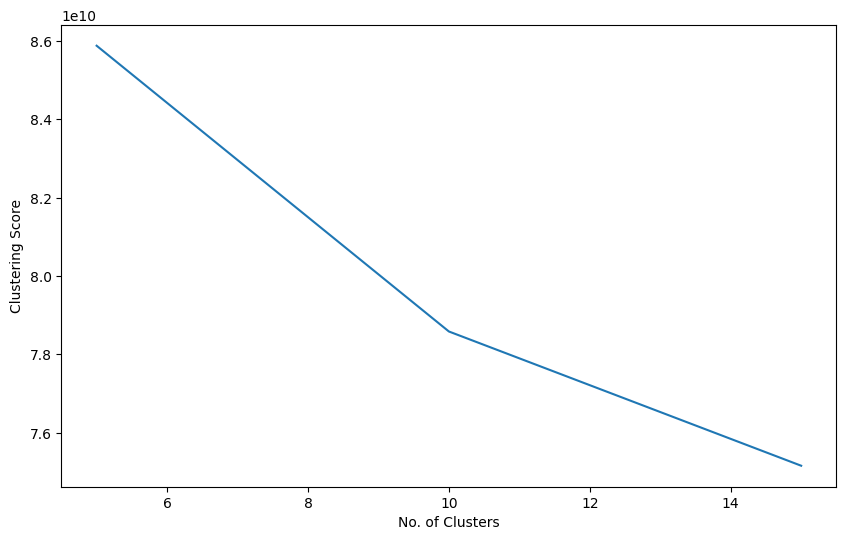

In [19]:
'''
  Submit the plot you get after running this piece of code in your solutions
'''
plt.figure(figsize=(10,6))
plt.plot(range(5, 20, 5), clustering_score)
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

### Visualize K Clusters for K = 10 and random_state = 42

In [20]:
from sklearn.decomposition import PCA
pca = PCA(2) 
#Transform the data
df = pca.fit_transform(X)

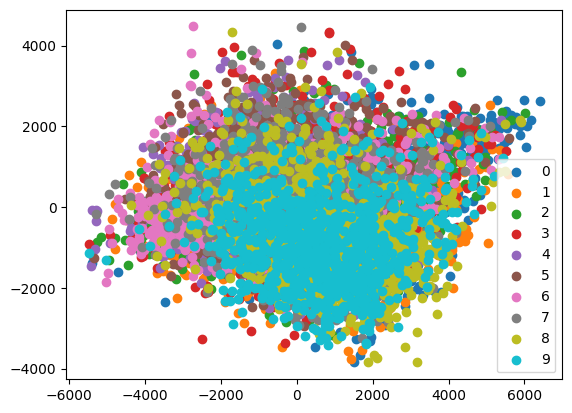

In [21]:
### Analyzing the input data in 2D based on its true labels

u_labels = np.unique(y[:, 0])

for i in u_labels:
    plt.scatter(df[y[:, 0] == i , 0] , df[y[:, 0] == i , 1] , label = i)
plt.legend()

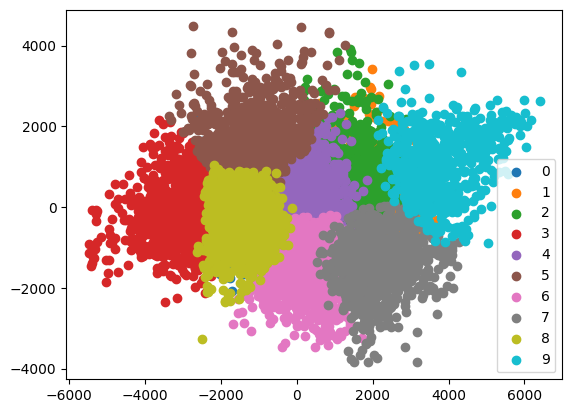

In [22]:
'''
  Submit the output plot as a part of the solutions
'''

kmeans = KMeans(n_clusters = 10, init = 'random', random_state = 42)
'''
  Write 1 - 2 line of code to get the predicted labels of the 10-clusters
'''
### ========== TODO : START ========== ###
kmeans = KMeans(n_clusters=10, init='random', random_state=42)
kmeans.fit(X)
label = kmeans.labels_
### ========== TODO : END ========== ###

u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    '''
      Write one line of code to get a scatter plot for i-th cluster.
      Have its label = i
    '''
    ### ========== TODO : START ========== ###
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)
    ### ========== TODO : END ========== ###
    
plt.legend()
plt.show()